## Homework 3
### Cohort 1 Group7
#### Members: Simon Geller, Alex Kanstantsinau, Weixia Cheng, Mengxiao Li, Darshan Parvadiya

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

# Import the data
df = pd.read_excel('PPIFGS.xls')

### Problem 1: AR(1) process
Consider a AR(1) process for $$ r_{t+1}\:with\:\phi_0 = 0.02,\:and\:\phi_1 = 0.9$$ 
<br> 1. Plot the autocorrelation function for this process.


<StemContainer object of 3 artists>

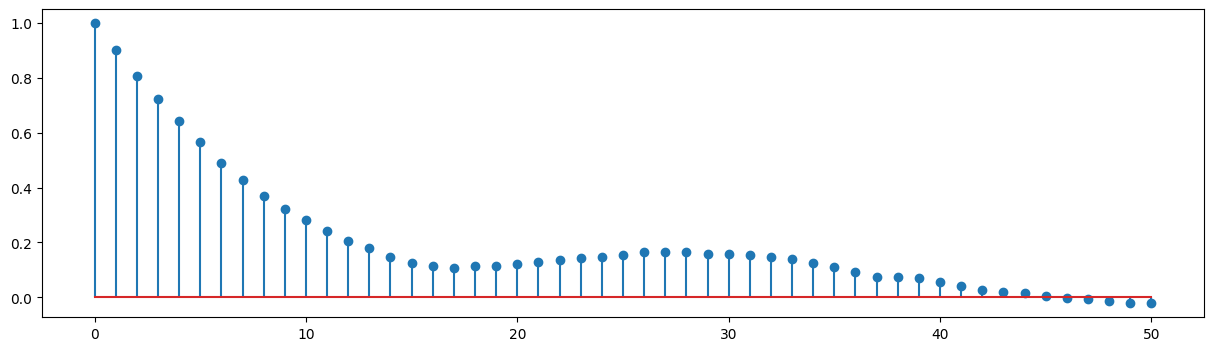

In [2]:
# Run autocorrelation for the given simple AR(1) process.
fi0 = .02
fi1 = .9
# Assume we are simulating 1000 data points
n = 1000
# We forefeit the error term since E[e] = 0
# Set the random seed
np.random.seed(123)
# Create an array of zeros for r's
r = np.zeros(n)
# Set the initial r value
r[0] = np.random.normal(0, 1)
for t in range(1, n):
    r[t] = fi0 + fi1*r[t-1] + np.random.normal(0, 1)
# Run the autocorrelation function with 50 lags
autocorrelation = sm.tsa.acf(r, nlags=50)
plt.figure(figsize=(15, 4))
plt.stem(range(51), autocorrelation)

2. Is the process stationary? Explain why or why not.

Answer: Yes, because $\phi_1 = 0.9 < 1$. From the plot we can find that the autocorelation turns to 0 as lag increase so the series will revert to the mean.

3. Note that we can express the current value of an AR(1) as a function of past shocks. In particular, define $x_t = r_t - \mu$ where $\mu=E(r_t)$ Then:
$$
x_t = \phi_1x_{t-1} + \varepsilon_t
= \phi_1(\phi_1x_{t-2} + \varepsilon_{t-1}) + \varepsilon_t
= \phi_1^2x_{t-2}+\phi_1\varepsilon_{t-1} + \varepsilon_t$$
etc.
<br>(a) Complete this backward substitution until you have an expression for $x_t$ as a
function of $\varepsilon_{t-1}, j= 0, 1, ..., \infty$ Please provide the final expression.


Answer: This is the Wold's Decomposion Theorem.
$$x_t = \phi_1x_{t-1} + \varepsilon_t$$
$$= \phi_1(\phi_1x_{t-2} + \varepsilon_{t-1}) + \varepsilon_t$$
$$= \phi_1^2x_{t-2}+ \phi_1\varepsilon_{t-1} + \varepsilon_t$$
$$= \phi_1^2(\phi_1x_{t-3}+ \varepsilon_{t-2}) + \phi_1\varepsilon_{t-1} + \varepsilon_t$$
$$=\sum_{j=0}^{\infty}\phi_1^j\varepsilon_{t-1}

(b) Compute the derivative:
$$\frac{\partial x_t}{\partial \varepsilon_{t-j}}= ?$$
This derivative is called the Dynamic Multiplier at horizon j. In words, it shows
the impact of a shock occuring j periods ago on the current value of the series
xt, given that the size of the shock is +1. If the dynamic multiplier of a shock
remains high for a long time, the shock is very persistent.

Answer: From the formula $x_t= \phi_1^2x_{t-2}+ \phi_1\varepsilon_{t-1} + \varepsilon_t$, we can recurse that $$\frac{\partial x_t}{\partial \varepsilon_{t-j}}= \phi_1^j$$

(c) Give the dynamic multiplier for the above AR(1) for a shock that occurred 6
periods ago.

In [3]:
fi1**6

0.531441

4. If $r_t = -0.01$ what is $E_t(r_{t+4})?$ Hint: it might be useful to recall that $E_t(r_{t+4}) =\mu + E_t(r_{t+4}), where\:x_t = r_t-\mu.$

In [4]:
rt = -0.01
mu = fi0/(1-fi1)
E_t4 = mu + (rt-mu)*fi1**4
E_t4

0.062219

### Problem 2: Applying the Box-Jenkins methodology<br><br>
In PPIFGS.xls you will find quarterly data for the Producer Price Index. Our goal is
to develop a quarterly model for the PPI, so we can come up with forecasts. Our boss
needs forecasts of inflation, because she wants to hedge inflation exposure. There is not a single 'correct' answer to this problem. Well-trained econometricians can end up choosing different specifications even though they are confronted with the same sample. However, there definitely are some wrong answers.
<br><br>1. We look for a covariance-stationary version of this series. Using the entire sample,
make a graph with four subplots:
<br>(a) Plot the PPI in levels.
<br>(b) Plot delta PPI
<br>(c) Plot logPPI
<br>(d) Plot delta logPPI.

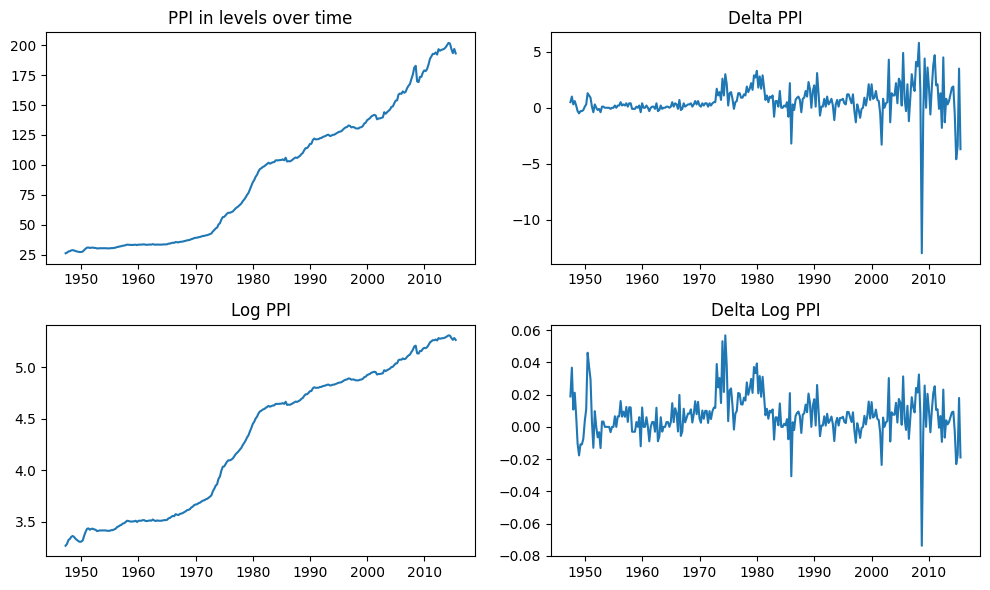

In [5]:
fig, ax = plt.subplots(2, 2, figsize = (10, 6))
ax[0, 0].plot(df['DATE'], df['VALUE'])
ax[0, 0].set_title('PPI in levels over time')
ax[0, 1].plot(df['DATE'][1:], np.diff(df['VALUE']))
ax[0, 1].set_title('Delta PPI')
ax[1, 0].plot(df['DATE'], np.log(df['VALUE']))
ax[1, 0].set_title('Log PPI')
ax[1, 1].plot(df['DATE'][1:], np.diff(np.log(df['VALUE'])))
ax[1, 1].set_title('Delta Log PPI')
plt.tight_layout()

2. Which version of the series looks covariance-stationary to you and why?

Answer: Delta PPI and log delta PPI look like stationary since the means are more centered around 0 and variances are more constant compared to pic 1&3.

3. Let's call the data yt. Plot the ACF of yt for 12 quarters for each of the four series in abcd. What do you conclude? In which case(s) is looking at the sample ACF a sensible exercise.

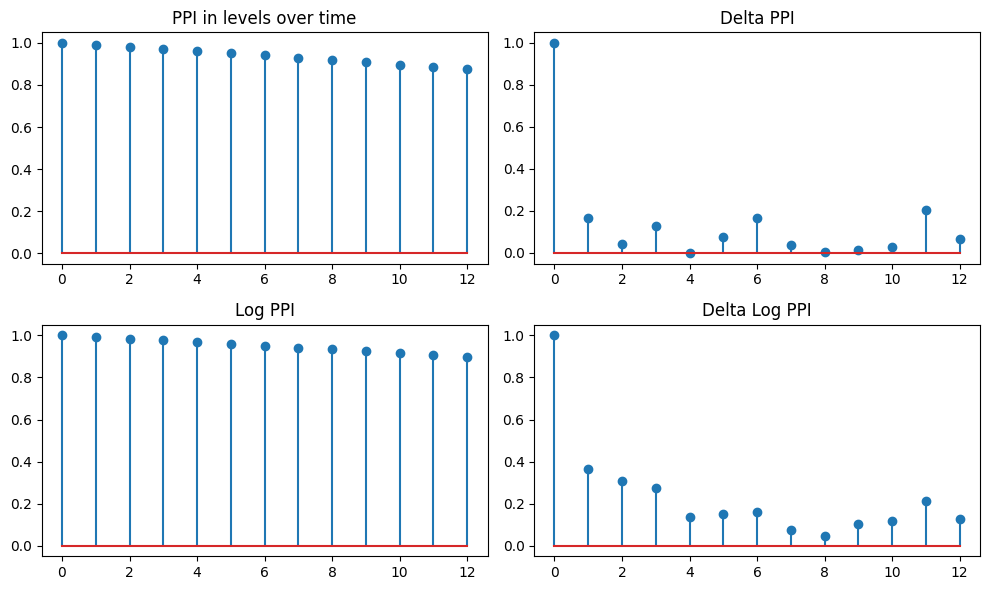

In [6]:
# Lets store last 12 values
fig, ax = plt.subplots(2, 2, figsize = (10, 6))
acf1 = sm.tsa.acf(df['VALUE'], nlags=12)
ax[0, 0].stem(range(13), acf1)
ax[0, 0].set_title('PPI in levels over time')
acf2 = sm.tsa.acf(np.diff(df['VALUE']), nlags=12)
ax[0, 1].stem(range(13), acf2)
ax[0, 1].set_title('Delta PPI')
acf3 = sm.tsa.acf(np.log(df['VALUE']), nlags=12)
ax[1, 0].stem(range(13), acf3)
ax[1, 0].set_title('Log PPI')
acf4 = sm.tsa.acf(np.diff(np.log(df['VALUE'])), nlags=12)
ax[1, 1].stem(range(13), acf4)
ax[1, 1].set_title('Delta Log PPI')
plt.tight_layout()

Answer:  Delta PPI and log delta PPI look sensible exercises for ACF since the autucorrelations have sharp cut-off after a few lags, which may support that the serieses are weak stationary.

4. On the basis of the ACF of the version of the series that you believe is covariance-stationary, do you think an AR(1) would be a good model for this data? In particular:


<br>(a) Estimate the AR(1) process on this data using an OLS regression with heteroskedasticity adjusted standard errors. Report the coe¢ cient estimates, their standard errors, and the R2.


In [7]:
X = np.diff(np.log(df['VALUE']))
y = X[1:]
X = X[:-1]
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit(cov_type='HC1')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     34.13
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           1.48e-08
Time:                        10:37:07   Log-Likelihood:                 813.64
No. Observations:                 272   AIC:                            -1623.
Df Residuals:                     270   BIC:                            -1616.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0045      0.001      5.620      0.000       0.003       0.006
x1             0.3707      0.063      5.842      0.000       0.246       0.495
==============================================================================
Omnibus:                       72.344   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              766.945
Skew:                          -0.701   Prob(JB):                    2.88e-167
Kurtosis:                      11.106   Cond. No.                         77.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

(b) Plot the AR(1) implied ACF on the same plot as the sample ACF of the series
you chose. Do they line up reasonably well?

Answer: They doesn't line up well. 

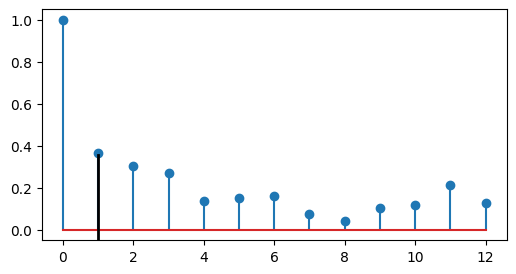

In [8]:
plt.figure(figsize=(6, 3))
plt.stem(range(13), acf4)
plt.axvline(x=1,ymin = 0, ymax=model.params[1], color='black',linewidth=2)
plt.show()

(c) Plot the residuals. (Note: the residuals will have conditional heteroskedasticity
or 'GARCH effects'. We will talk about this later. However, in well-specified
prediction models, the residuals should not be autocorrelated.)

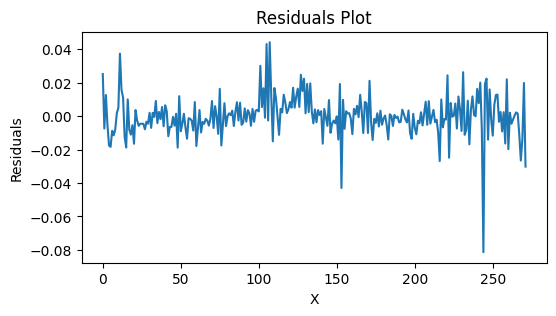

In [9]:
residuals = model.resid
plt.figure(figsize=(6, 3))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()

(d) Report the Ljung-Box Q-statistic and p-values for the residuals for m equal to 8
and 12 quarters. Are the residuals unpredictable?

Answer:   
For m = 8 quarters, the Ljung-Box Q-statistic is approximately 19.98836 with a p-value of 0.010378. The p-value is less than 0.05, which suggests that we can reject the null hypothesis, indicating that the residuals exhibit significant autocorrelation at one or more of the first 8 lags.  
For m = 12 quarters, the Ljung-Box Q-statistic is approximately 30.374213 with a p-value of 0.002452. The p-value is also less than 0.05, further suggesting that we can reject the null hypothesis, indicating significant autocorrelation in the residuals at one or more of the first 12 lags.   
In conclusion, the residuals do not seem to be unpredictable because there is evidence of autocorrelation at both the 8 and 12 quarter lags.

In [10]:
ljung_box_8 = acorr_ljungbox(residuals, lags=[8], return_df=True)
print(ljung_box_8)

     lb_stat  lb_pvalue
8  19.988836   0.010378


In [11]:
ljung_box_12 = acorr_ljungbox(residuals, lags=[12], return_df=True)
print(ljung_box_12)

      lb_stat  lb_pvalue
12  30.374213   0.002452
